In [2]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.patches as mpatches

In [3]:
# Summation of the value insde a dictionary
def dictsum(myDict):      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    return sum

In [4]:
# We only care about the country sequence
file = open("/mnt/c/Users/Shiyuan Wang/Desktop/comparison/Total_pop.json", "r")
population2 = file.read()
population2 = json.loads(population2)
Countries = list(population2.keys())
# population
file = open("/mnt/c/Users/Shiyuan Wang/Desktop/new_results/Total_pop_newest.json", "r")
population = file.read()
population = json.loads(population)
population = {k: population[k] for k in Countries}

In [5]:
file = open("../2_Concentration_Factors/total_output.json", "r")
total_output = file.read()
total_output = json.loads(total_output)

file = open("../2_Concentration_Factors/final_demand.json", "r")
final_demand = file.read()
final_demand = json.loads(final_demand)

In [6]:
# per million USD
# EORA is in 1000 USD
for i in Countries:
    total_output[i] = total_output[i] * 1000 
    final_demand[i] = final_demand[i] * 1000 

In [7]:
# total number of deaths caused by country i and happen in country j
file = open("con_mort_tol.json", "r")
con_mort_tol = file.read()
con_mort_tol = json.loads(con_mort_tol)

In [8]:
# total number of deaths caused by country i and happen in country j
file = open("pro_mort_tol.json", "r")
pro_mort_tol = file.read()
pro_mort_tol = json.loads(pro_mort_tol)

In [9]:
# Row sum: total deaths happen in that country
con_total = dict(pd.DataFrame(con_mort_tol).sum(axis = 1))
pro_total = dict(pd.DataFrame(pro_mort_tol).sum(axis = 1))

In [10]:
# Col sum: total deaths caused by that country
con_caused = dict(pd.DataFrame(con_mort_tol).sum(axis = 0))
pro_caused = dict(pd.DataFrame(pro_mort_tol).sum(axis = 0))

In [11]:
# total deaths happen in that country
con_dom_world = {}
for country in con_mort_tol:
    con_dom_world[country] = {}
    con_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_dom_world[country]['world'] = con_total[country]
    con_dom_world[country]['OtherPartofWorld'] = con_dom_world[country]['world'] - con_dom_world[country]['domestic']

In [12]:
# total deaths caused by that country
con_cause_dom_world = {}
for country in con_mort_tol:
    con_cause_dom_world[country] = {}
    con_cause_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_cause_dom_world[country]['world'] = con_caused[country]
    con_cause_dom_world[country]['OtherPartofWorld'] = con_cause_dom_world[country]['world'] - con_cause_dom_world[country]['domestic']

In [13]:
net_export_death = {}
export_of_death = {}
import_of_death = {}

for country in con_cause_dom_world:
    if country != 'ROW':
        # net export of deaths
        net_export_death[country] = (con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld'])
        # total foreign deaths caused by that country's demand
        export_of_death[country] = con_cause_dom_world[country]['OtherPartofWorld']
        # total deaths happen in that country caused by foreign demand
        import_of_death[country] = con_dom_world[country]['OtherPartofWorld']

In [14]:
net_export_death['SOM']

830.812909080071

In [15]:
print(dict(sorted(net_export_death.items(), key=lambda item: item[1])))

{'CHN': -218437.64546950755, 'IND': -129200.3411429341, 'BGD': -35955.472116033205, 'VNM': -21990.234198175836, 'ROU': -16225.407631850965, 'RUS': -13291.401035606461, 'UKR': -12780.54586826509, 'IDN': -11793.118078256724, 'PRK': -10263.032684904741, 'BRA': -10029.614135133641, 'THA': -6685.971255235832, 'ETH': -6203.554926312141, 'BGR': -6006.9582757742855, 'MEX': -5959.941215928113, 'NPL': -5344.940552557151, 'COD': -4930.541898777621, 'SYR': -3952.2836944757278, 'HUN': -3755.094256396076, 'HTI': -3723.582587566705, 'AZE': -2704.1914727166886, 'AGO': -2665.487483964722, 'COL': -2598.616708609734, 'KHM': -2590.383176736282, 'PER': -2006.4122572913366, 'UGA': -1989.5259543488742, 'GRC': -1877.0852917686107, 'GEO': -1764.2494108182048, 'MDA': -1540.6405984274484, 'EGY': -1475.1575660103808, 'MAR': -1399.7416137021773, 'TWN': -1140.2951722210819, 'SLV': -1112.436025725738, 'ECU': -903.8368320252539, 'CMR': -896.3326559361544, 'GTM': -871.5800025843146, 'ARM': -792.4294778408158, 'PSE': -

In [16]:
print(sorted(con_total.items(), key=lambda item: item[1],reverse=True)[:6])
print(sorted(con_caused.items(), key=lambda item: item[1],reverse=True)[:5])

[('CHN', 1241848.475484423), ('IND', 576492.7342931574), ('IDN', 169699.42867745517), ('JPN', 106707.94366040881), ('BRA', 92051.51869995154), ('USA', 86781.66618595831)]
[('CHN', 1023410.8300149156), ('IND', 447292.39315022324), ('USA', 230725.6868888209), ('IDN', 157906.31059919845), ('JPN', 124004.26105568584)]


In [17]:
net_export_death_per = {} # per population

for country in con_cause_dom_world:
    if country != 'ROW':
        net_export_val = (con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld'])/(population[country]/10000)
        if net_export_val > 100:
            net_export_death_per[country] = 100
#         elif net_export_val > 100000:
#             net_export_death_per[country] = 100000
        else:
            net_export_death_per[country] = net_export_val

In [18]:
population.pop('ROW')
final_demand.pop('ROW')

0.0

In [19]:
df_shp = gpd.read_file('/mnt/c/Users/Shiyuan Wang/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [20]:
df_shp.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [21]:
df_new = pd.DataFrame({'ADM0_A3': list(net_export_death.keys()),'net_export': list(net_export_death.values()),
                      'population': list(population.values()),'final_demand': list(final_demand.values()),
                      'export_of_death': list(export_of_death.values()),'import_of_death': list(import_of_death.values())},)

In [22]:
df_final = pd.merge(df_new,df_shp,how="left",on=["ADM0_A3"])

In [23]:
df_final = df_final[['ADM0_A3','NAME','net_export','export_of_death','import_of_death','population','final_demand','CONTINENT']]

In [24]:
for i in range(len(df_final)):
    if df_final.loc[i,'ADM0_A3'] == 'PSE':
        df_final.loc[i,'CONTINENT'] == df_shp[df_shp['ADM0_A3']=='PSX']['CONTINENT']

In [25]:
df_final.loc[list(net_export_death.keys()).index('PSE'),'CONTINENT'] = df_shp[df_shp['ADM0_A3']=='PSX']['CONTINENT'].values[0]

In [26]:
df_final.loc[list(net_export_death.keys()).index('SUD'),'CONTINENT'] = df_shp[df_shp['ADM0_A3']=='SDN']['CONTINENT'].values[0]

In [27]:
df_final['CONTINENT']=pd.Categorical(df_final['CONTINENT'])

In [28]:
df_final['CONTINENT_code'] = df_final['CONTINENT'].cat.codes

In [29]:
continent = ['Africa','Asia','Europe','North America','Oceania','Seven seas (open ocean)','South America']

In [30]:
continent2 = {'0':'Africa','1':'Asia','2':'Europe','3':'North America','4':'Oceania','5':'Seven seas (open ocean)','6':'South America'}

In [31]:
df_final[df_final['CONTINENT']=='Seven seas (open ocean)']

,ADM0_A3,NAME,net_export,export_of_death,import_of_death,population,final_demand,CONTINENT,CONTINENT_code
105,MDV,Maldives,201.251746,270.641079,69.389333,5.909558e+05,3.374815e+09,Seven seas (open ocean),5
109,MUS,Mauritius,360.984105,484.970018,123.985913,1.291254e+06,1.115682e+10,Seven seas (open ocean),5
148,SYC,Seychelles,174.947647,177.346482,2.398836,1.051095e+05,1.362116e+09,Seven seas (open ocean),5


In [32]:
# Change seven seas to other
df_final['CONTINENT'] = df_final['CONTINENT'].replace(['Seven seas (open ocean)'], 'Other')

In [33]:
df_final['CONTINENT'].unique()

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Other']
Categories (7, object): ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Other']

In [34]:
df_final['net_export_capita'] = df_final['net_export']/df_final['population']
df_final['final_demand_capita'] = df_final['final_demand']/df_final['population']

In [35]:
df_final

,ADM0_A3,NAME,net_export,export_of_death,import_of_death,population,final_demand,CONTINENT,CONTINENT_code,net_export_capita,final_demand_capita
0,AFG,Afghanistan,437.294550,4749.188636,4311.894085,3.056780e+07,2.447052e+10,Asia,1,0.000014,800.532522
1,ALB,Albania,-94.854957,901.112178,995.967135,2.895460e+06,1.346807e+10,Europe,2,-0.000033,4651.443752
2,DZA,Algeria,3023.901587,6019.886216,2995.984628,4.414247e+07,1.833768e+11,Africa,0,0.000069,4154.204742
3,AND,Andorra,42.552640,50.128522,7.575882,1.084263e+05,2.857466e+09,Europe,2,0.000392,26354.002159
4,AGO,Angola,-2665.487484,2114.379991,4779.867474,3.676776e+07,9.788361e+10,Africa,0,-0.000072,2662.212628
...,...,...,...,...,...,...,...,...,...,...,...
182,VEN,Venezuela,14588.784775,15776.362844,1187.578069,3.229033e+07,3.873810e+11,South America,6,0.000452,11996.813178
183,VNM,Vietnam,-21990.234198,10082.443551,32072.677749,9.895143e+07,1.995281e+11,Asia,1,-0.000222,2016.424298
184,YEM,Yemen,-156.568027,2816.760749,2973.328776,3.042738e+07,3.166482e+10,Asia,1,-0.000005,1040.668685
185,ZMB,Zambia,188.927469,1656.877956,1467.950487,1.861695e+07,2.202121e+10,Africa,0,0.000010,1182.858128


In [36]:
df_final.loc[30,'NAME'] = 'Palestine'

In [37]:
df_final.to_csv('map_continent.csv')

In [38]:
for continent in list(df_final['CONTINENT'].unique()):
    df_continent = df_final[df_final['CONTINENT'] == continent]
    total_number = len(df_continent)
    negative = len(df_continent[df_continent['net_export'] < 0])
    positive = len(df_continent[df_continent['net_export'] >= 0])
    print(continent,'negative',negative/total_number,'positive',positive/total_number)

Asia negative 0.3673469387755102 positive 0.6326530612244898
Europe negative 0.2558139534883721 positive 0.7441860465116279
Africa negative 0.5102040816326531 positive 0.4897959183673469
North America negative 0.2608695652173913 positive 0.7391304347826086
South America negative 0.4166666666666667 positive 0.5833333333333334
Oceania negative 0.0 positive 1.0
Other negative 0.0 positive 1.0


-----

In [39]:
df_final.sort_values(by=['net_export'],ascending=True,inplace=True)
df_final.reset_index(drop=True,inplace=True)

In [40]:
df_final

,ADM0_A3,NAME,net_export,export_of_death,import_of_death,population,final_demand,CONTINENT,CONTINENT_code,net_export_capita,final_demand_capita
0,CHN,China,-218437.645470,121772.328803,340209.974272,1.444650e+09,1.086378e+13,Asia,1,-0.000151,7520.006432
1,IND,India,-129200.341143,103782.518711,232982.859854,1.409461e+09,2.166778e+12,Asia,1,-0.000092,1537.309263
2,BGD,Bangladesh,-35955.472116,13290.804708,49246.276824,1.643983e+08,2.291324e+11,Asia,1,-0.000219,1393.763771
3,VNM,Vietnam,-21990.234198,10082.443551,32072.677749,9.895143e+07,1.995281e+11,Asia,1,-0.000222,2016.424298
4,ROU,Romania,-16225.407632,4709.992277,20935.399909,3.314418e+07,1.818005e+11,Europe,2,-0.000490,5485.140859
...,...,...,...,...,...,...,...,...,...,...,...
182,FRA,France,25222.656626,29864.606945,4641.950320,7.037750e+07,2.467953e+12,Europe,2,0.000358,35067.355548
183,TUR,Turkey,25674.210781,39342.654066,13668.443286,8.119245e+07,8.107386e+11,Asia,1,0.000316,9985.394269
184,GBR,United Kingdom,27933.411575,31098.098406,3164.686831,6.787015e+07,2.739458e+12,Europe,2,0.000412,40363.215146
185,SAU,Saudi Arabia,37645.486365,40775.339888,3129.853523,3.685602e+07,6.380188e+11,Asia,1,0.001021,17311.116404


In [41]:
color_map = {'Africa':"#7fc97f",'Asia':"#beaed4",'Europe':"#fdc086",'North America':"#a6cee3",'Oceania':"#386cb0",'South America':"#bf5b17",'Other':"#f0027f"}

In [42]:
df_final['colors']=np.nan
for i in range(len(df_final)):
    df_final.loc[i,'colors'] = color_map[df_final.loc[i,'CONTINENT']]

In [43]:
patches = []
for i in color_map:
    patches.append(mpatches.Patch(color=color_map[i], label=i))

In [44]:
country1_list = list(df_final['ADM0_A3'])[:10]
country2_list = list(df_final['ADM0_A3'])[-10:]

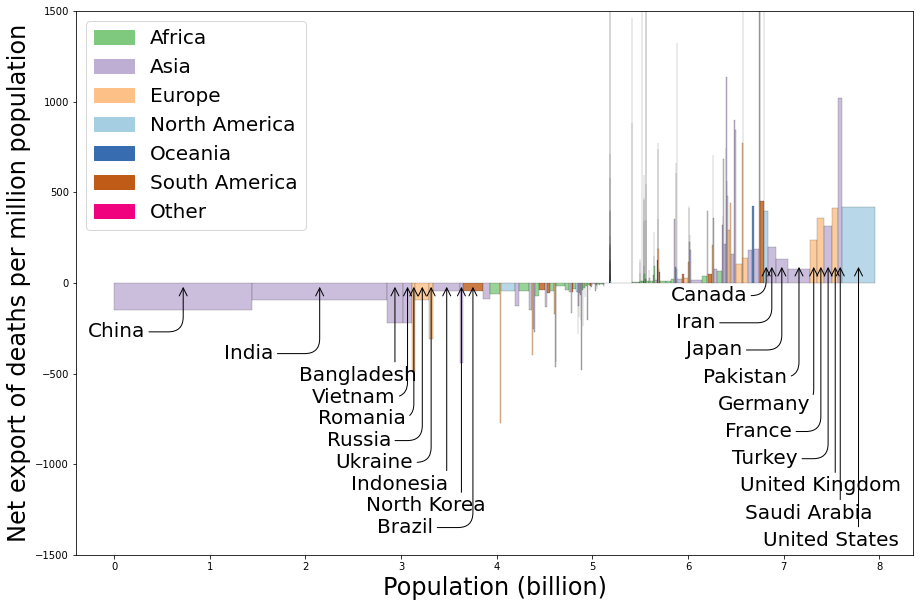

In [45]:
plt.subplots(figsize=(15, 10))

y = df_final['net_export']/(df_final['population']/1000000)

w = df_final['population']/1000000000

colors = df_final['colors']

#plt.bar(x, height = y, width = w, color = colors, alpha = 0.8)

xticks=[]
for n, c in enumerate(w):
    xticks.append(sum(w[:n]) + w[n]/2)
    
w_new = [i/max(w) for i in w]
plt.ylim(-1500,1500)
a = plt.bar(xticks, height = y, width = w, color = colors, alpha = 0.8, linewidth = 0.2, edgecolor = 'black')
# b = plt.xticks(xticks, df_final['ADM0_A3'])


arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 15")

count1 = -300
for i in country1_list:
    
    c_index = list(df_final['ADM0_A3']).index(i)
    x_loc = sum(w[:c_index]) + (w[c_index]/2)
    y_loc = -10
    y_text_loc = count1
    plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(x_loc,y_loc),size=20,
        arrowprops = arrowprops,
#                  arrowprops = dict(facecolor ='black',shrink = 0.05),
        xytext =(x_loc-1,y_text_loc)
                )
    count1 -= 120
        


count2 = -100
for j in country2_list:
    c_index2 = list(df_final['ADM0_A3']).index(j)
    x_loc2 = sum(w[:c_index2]) + (w[c_index2]/2)
    y_loc2 = 100
    y_text_loc2 = count2
    plt.annotate(df_final[df_final['ADM0_A3']==j]['NAME'].values[0][:14],xy=(x_loc2,y_loc2),size=20,
        arrowprops = arrowprops,
#                  arrowprops = dict(facecolor ='black',shrink = 0.05),
        xytext =(x_loc2-1,y_text_loc2)
                )
    count2 -= 150

plt.xlabel("Population (billion)",fontsize=24)
plt.ylabel("Net export of deaths per million population",fontsize=24)

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.legend(handles=patches,fontsize=20)

# plt.legend(a.patches, df_final['CONTINENT'])

In [46]:
df_final[df_final['net_export_capita']>=0]['population'].sum()

2784540340.8534756

In [43]:
df_final[df_final['net_export_capita']<0]['population'].sum()

5077717981.108241

In [44]:
5077717981.108241/(2878497528.418937+5077717981.108241)

0.6382076974948608

In [1]:
import numpy as np
import scipy.stats as stats

def generate(data):
    
    muA = np.random.choice(range(10, 16)) * 0.5
    sdA = np.random.choice(range(4, 11)) / 10.0
    muB = np.random.choice(range(10, 16)) * 0.5
    sdB = np.random.choice(range(4, 11)) / 10.0
    AsamN = np.random.choice(range(32, 39))
    BsamN = np.random.choice(range(47, 56))
    deviate = np.random.choice([1.0, 1.5, 2.0])
    
    # This is the parameter for test
    # muA = 6.5
    # sdA = 0.9
    # muB = 6
    # sdB = .8
    # AsamN = 36
    # BsamN = 49
    # deviate = 1
    
    z = (deviate - (muA - muB)) / np.sqrt(sdA**2 / AsamN + sdB**2 / BsamN)
    ans1 = 1 - stats.norm.cdf(z)

    
    ans = {
        "muA": float(muA),
        "sdA": float(sdA),
        "muB": float(muB),
        "sdB": float(sdB),
        "AsamN": int(AsamN),
        "BsamN": int(BsamN),
        "deviate": float(deviate),
        "ans1": float(ans1)  
    }

    data["params"] = ans
    data["correct_answers"] = ans

In [3]:
generate(0.2)

TypeError: 'float' object does not support item assignment